# API VK

__API (Application Programming Interface__ — это уже готовый код, который можно всунуть в свой код! Многие сервисы, в том числе Google и Вконтакте, предоставляют свои уже готовые решения для вашей разработки.

Примеры: 

* [Контактовский API](https://vk.com/dev/methods)
* [API twitter](https://developer.twitter.com/en/docs.html) - nope
* [API youtube](https://developers.google.com/youtube/v3/) 
* [API google maps](https://developers.google.com/maps/documentation/) 
* [Aviasales](https://www.aviasales.ru/API)
* [Yandex Translate](https://yandex.ru/dev/translate/)

Оно есть почти везде! На этом семинаре мы посмотрим на два примера: на API контакта и google maps.

## 3.1 API vk

Зачем может понадобиться доступ к API контакта, думаю, объяснять не надо. Социальная сетка — это тонны различной полезной информации, которую можно заиспользовать для своих целей. [В документации](https://vk.com/dev/manuals) очень подробно описано как можно работать с API контакта и к чему это приводит. 

Но для начала к API нужно получить доступ. Для этого придётся пройти пару бюрократических процедур (о, боже, эти два предложения были так бюрократически сформулированы, что мне захотелось отстоять в очереди).

Первая такая процедура заключается в создании своего приложения. Для этого переходим по [ссылке](http://vk.com/editapp?act=create) и проходимся по необходимым шагам:

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_1.png" width="500">

После подтверждения своей личности по номеру телефона, попадаем на страницу свежесозданного приложения

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_2.png" width="500">

Слева нам будем доступна вкладка с настройками, перейдя в неё мы увидим все необходимые нам для работы с приложением параметры:
<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_3.png" width="500">

Отсюда в качестве токена можно забрать сервисный ключ доступа. Для работы с частью методов API этого вполне достаточно (обычно в заголовке такого метода стоит соответствующая пометка). Иногда нужны дополнительные доступы. Для того, чтобы получить их, необходимо сделать ещё пару странных манипуляций:

Переходим по ссылке вида (на месте звездочек должен стоять ID созданного вами приложения):

> https://oauth.vk.com/authorize?client_id=**********&scope=8198&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token

В итоге по этому запросу будет сформирована ссылка следующего вида:
> https://oauth.vk.com/blank.html#access_token=25b636116ef40e0718fe4d9f382544fc28&expires_in=86400&user_id=*******

Первый набор знаков — `access token`, т.е. маркер доступа. Вторая цифра (`expires_in=`) время работы маркера доступа в секундах (одни сутки). По истечению суток нужно будет получить новый маркер доступа. Последняя цифра (`user_id=`) ваш ID Вконтакте. Нам в дальнейшем понадобится маркер доступа. Для удобства сохраним его в отдельном файле или экспортируем в глобальную область видимости. В целях безопасности ваших данных не стоит нигде светить токенами и тем более выкладывать их в открытый доступ. __Так можно и аккаунта случайно лишиться.__ Берегите токен смолоду. 

Обратите внимание на ссылку, по которой мы делали запрос на предоставление токена. Внутри неё находится странный параметр `scope=8198.` Это мы просим доступ к конкретным разделам. Подробнее познакомиться с взаимно-однозначным соответствием между числами и правами можно [в документации.](https://vk.com/dev/permissions) Например, если мы хотим получить доступ к друзьям, фото и стенам, мы подставим в scope цифру 2+4++8192=8198.

In [1]:
import requests

In [2]:
# мой номер странички
myid = '153433657'  # вставить номер странички

# версия используемого API
version = '5.103' 
token = '9c1bcfcb9c1bcfcb9c1bcfcbfb9c673f4d99c1b9c1bcfcbfe846612e51341b8587ce44a'


In [3]:
requests.get(f'https://api.vk.com/method/users.get?user_id=153433657&v={version}&access_token={token}').json()

{'response': [{'id': 153433657,
   'first_name': 'Yan',
   'last_name': 'Pile',
   'can_access_closed': True,
   'is_closed': False}]}

Чтобы скачать что-то из контакта, надо сделать ссылку и сходить по ней пакетом `requests`. Ссылка должна будет включать в себя метод (что мы просим у вк) и параметры (насколько много и как именно). Мы будем просто заменять эти две штуки и выкачивать разные вещи. 

In [4]:
method = 'users.get'
parameters = 'user_ids=80406183'

url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token

response = requests.get(url) 
response.json()

{'response': [{'id': 80406183,
   'first_name': 'Margarita',
   'last_name': 'Burova',
   'can_access_closed': True,
   'is_closed': False}]}

В ответ на наш запрос vk выкидывает JSON с информацией. JSON очень похож на питонячие словарики. Смысл квадратных и фигурных скобок такой же. Правда, есть и отличия: например, в Python одинарные и двойные кавычки ничем не отличаются, а в JSON можно использовать только двойные. 

Мы видим, что полученный нами JSON представляет собой словарь, значения которого — строки или числа, а также списки или словари, значения которых в свою очередь также могут быть строками, числами, списками, словарями и т.д. То есть получается такая довольно сложная структура данных, из которой можно вытащить всё то, что нас интересует. 

In [5]:
response.json()['response'][0]['first_name']

'Margarita'

[В документации](https://vk.com/dev/manuals) очень подробно описано какие есть методы и какие у них бывают параметры.  Давайте завернём код выше в функцию и попробуем что-нибудь скачать.

In [6]:
def vk_download(method, parameters):
    
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url) 
    infa = response.json()
    return infa

Например, все лайки с [хайер скул оф мемс.](https://vk.com/hsemem)
Как найти адрес страницы [тут](https://vk.com/faq18062)

In [7]:
group_id = '-139105204'  # взяли из ссылки на группу

In [8]:
wall = vk_download('wall.get', 'owner_id={}&count=100'.format(group_id))
wall = wall['response']

In [9]:
wall['items'][5]

{'comments': {'count': 1},
 'marked_as_ads': 0,
 'hash': '4DWUF6T-nOcAInhqmw',
 'type': 'post',
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1678138555,
    'id': 457267551,
    'owner_id': -139105204,
    'access_key': '5b8d28b040436f2048',
    'post_id': 96085,
    'sizes': [{'height': 69,
      'type': 's',
      'width': 75,
      'url': 'https://sun1-87.userapi.com/impg/XvTcXfoRCWDJx-l8Pt-p9zvncWNdtZUX5_EJJw/8qaqHINW5IQ.jpg?size=75x69&quality=96&sign=64a37ae14de87e77ee0c776a2c226a55&c_uniq_tag=OrtT7fjNedfNbE7hCGb3ysFwqKmSUTuKuBv8FxUAVF4&type=album'},
     {'height': 119,
      'type': 'm',
      'width': 130,
      'url': 'https://sun1-87.userapi.com/impg/XvTcXfoRCWDJx-l8Pt-p9zvncWNdtZUX5_EJJw/8qaqHINW5IQ.jpg?size=130x119&quality=96&sign=e78b2e82364d70ab1e2523ca7b90478b&c_uniq_tag=UghAzZG7ZmoJEMjGdGPRWO_bjdQyDYFt6ZYunaoUtnI&type=album'},
     {'height': 554,
      'type': 'x',
      'width': 604,
      'url': 'https://sun1-87.userapi.com/impg/XvTcXfo

In [10]:
post = vk_download('wall.getComments', 'owner_id={}&post_id=87730'.format(group_id))

In [11]:
post

{'response': {'count': 7,
  'items': [{'id': 87731,
    'from_id': 385920930,
    'date': 1647792075,
    'text': 'Дед: поступил в МГУ',
    'post_id': 87730,
    'owner_id': -139105204,
    'parents_stack': [],
    'thread': {'count': 0,
     'items': [],
     'can_post': True,
     'show_reply_button': True,
     'groups_can_post': True}},
   {'id': 87732,
    'from_id': 157683966,
    'date': 1647792568,
    'text': '*а делать это с вечера',
    'post_id': 87730,
    'owner_id': -139105204,
    'parents_stack': [],
    'thread': {'count': 0,
     'items': [],
     'can_post': True,
     'show_reply_button': True,
     'groups_can_post': True}},
   {'id': 87733,
    'from_id': 550443032,
    'date': 1647792695,
    'text': 'Одно другому не мешает',
    'post_id': 87730,
    'owner_id': -139105204,
    'parents_stack': [],
    'thread': {'count': 0,
     'items': [],
     'can_post': True,
     'show_reply_button': True,
     'groups_can_post': True}},
   {'id': 87734,
    'from_id': 

In [12]:
post['response']['items']

[{'id': 87731,
  'from_id': 385920930,
  'date': 1647792075,
  'text': 'Дед: поступил в МГУ',
  'post_id': 87730,
  'owner_id': -139105204,
  'parents_stack': [],
  'thread': {'count': 0,
   'items': [],
   'can_post': True,
   'show_reply_button': True,
   'groups_can_post': True}},
 {'id': 87732,
  'from_id': 157683966,
  'date': 1647792568,
  'text': '*а делать это с вечера',
  'post_id': 87730,
  'owner_id': -139105204,
  'parents_stack': [],
  'thread': {'count': 0,
   'items': [],
   'can_post': True,
   'show_reply_button': True,
   'groups_can_post': True}},
 {'id': 87733,
  'from_id': 550443032,
  'date': 1647792695,
  'text': 'Одно другому не мешает',
  'post_id': 87730,
  'owner_id': -139105204,
  'parents_stack': [],
  'thread': {'count': 0,
   'items': [],
   'can_post': True,
   'show_reply_button': True,
   'groups_can_post': True}},
 {'id': 87734,
  'from_id': 104955490,
  'date': 1647795576,
  'text': 'Наоборот хороший повод…',
  'post_id': 87730,
  'owner_id': -139105

In [13]:
wall['items'][0].keys()

dict_keys(['is_pinned', 'comments', 'marked_as_ads', 'hash', 'type', 'attachments', 'date', 'edited', 'from_id', 'id', 'likes', 'owner_id', 'post_type', 'reposts', 'text', 'views'])

In [14]:
wall['items'][0]['edited']

1631891776

In [15]:
wall['items'][0]['likes']['count']

1477

In [16]:
likes = [item['likes']['count'] for item in wall['items']]
likes[:10]

[1477, 9, 329, 195, 568, 695, 737, 565, 637, 110]

За один запрос скачалось всего-лишь $100$ постов с лайками. В паблике их целых

In [17]:
wall['count']

9094

[Документация](https://vk.com/dev/manuals) говорит, что есть параметр `offset`, с помощью которого можно указать какие именно посты из группы нужно скачать. Например, если мы укажем `offset = 100`, скачается вторая сотня. Наше дело за малым: написать цикл. 

In [18]:
likes = []

from tqdm import tqdm

In [19]:
import time

likes = [ ] # сюда буду сохранять лайки

for offset in tqdm(range(0, 4800, 100)):
    
    time.sleep(0.4) # вк согласен работать 3 раза в секунду, 
                    # между запросами python спит 0.4 секунды
    
    wall = vk_download('wall.get', 'owner_id={}&count=100&offset={}'.format(group_id, offset))
    
    likes.extend([item['likes']['count'] for item in wall['response']['items']])

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [01:29<00:00,  1.86s/it]


Лайки в наших руках. Можем даже посмотреть на их распределение и попробовать что-то с ними сделать. 

In [20]:
len(likes)

4800

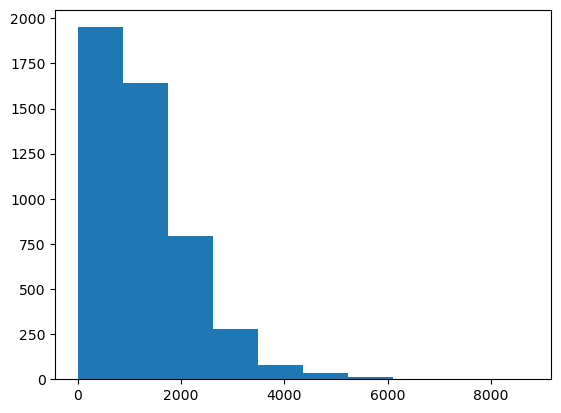

In [21]:
import matplotlib.pyplot as plt 

plt.hist(likes);

В принципе похожим образом можно скачать что угодно.

### Хитрость:  pd.read_html

Если на странице, которую вы спарсили, среди тэгов `<tr>` и `<td>` прячется таблица, чаще всего можно забрать её себе без написания цикла, который будет перебирать все стобцы и строки. Поможет в этом `pd.read_html`. Например, вот так можно забрать себе [табличку с сайта ЦБ](https://cbr.ru/currency_base/daily/) 

In [22]:
import pandas as pd
from bs4 import BeautifulSoup

df = pd.read_html('https://cbr.ru/currency_base/daily/')[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,506548
1,944,AZN,1,Азербайджанский манат,443869
2,51,AMD,100,Армянских драмов,194178
3,933,BYN,1,Белорусский рубль,266212
4,975,BGN,1,Болгарский лев,410721


Команда пытается собрать в массив все таблички c веб-страницы. Если хочется, можно сначала через bs4 найти нужную таблицу, а потом уже распарсить её: 

In [23]:
resp = requests.get('https://cbr.ru/currency_base/daily/')
tree = BeautifulSoup(resp.content, 'html.parser')

# нашли табличку
table = tree.find_all('table', {'class' : 'data'})[0]

# распарсили её
df = pd.read_html(str(table))[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,506548
1,944,AZN,1,Азербайджанский манат,443869
2,51,AMD,100,Армянских драмов,194178
3,933,BYN,1,Белорусский рубль,266212
4,975,BGN,1,Болгарский лев,410721
